In [2]:
# Votre analyse sous forme de Jupyter Notebook déposé sur votre git en PUBLIC devra contenir:
# * Une problématique pertinente (c-a-d ou il est possible de répondre avec des données)
# * Au moins 1 diagramme avec données continues, type nuage de point ou histogramme
# * Au moins 2 diagrammes avec des données discrètes
# * Au moins 3 graphiques avec des données catégoriques
# * 1 boîte à moustaches avec filtrage des données aberrantes sur le dataset (si il y en a)
# * 1 heat map avec matrice de corrélation (si pertinent)
# * Des commentaires clairs et pertinents pour chaque graphiques 


In [183]:
# Est-ce que les entreprises embauchent seulement ceux qui sont diplômés, si non, le diplôme est-il un facteur important sur le salaire

# - Quel sont les postes occupés par rapport au diplôme
# - les domaines d'entreprise qu'on a
# - la majorité des profiles dans une entreprise + l'industry
# - Est-ce que il y une difference de salaires entre ceux qui sont diplômés ou pas
# - Moyenne de salaire
# - Quelle sont les corr qui impact le salaire
# - 

In [202]:
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv('./Data/EmployEarnings Data.csv')

# A partir de 100 000 0 individus,on sélectionne 400 individus représentatifs
df = df.sample(10000)
df 
#df.describe()
#df.info()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
294247,COMP48,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,8,82,40
19144,COMP19,SENIOR,MASTERS,MATH,FINANCE,15,13,154
860836,COMP13,VICE_PRESIDENT,NONE,NONE,HEALTH,7,68,97
391147,COMP55,JANITOR,HIGH_SCHOOL,NONE,SERVICE,23,46,79
141917,COMP6,VICE_PRESIDENT,HIGH_SCHOOL,NONE,EDUCATION,14,30,113
...,...,...,...,...,...,...,...,...
779543,COMP27,CFO,BACHELORS,MATH,WEB,18,33,173
239394,COMP43,CFO,HIGH_SCHOOL,NONE,AUTO,17,6,121
820853,COMP37,JUNIOR,HIGH_SCHOOL,NONE,WEB,1,99,69
625447,COMP11,JUNIOR,MASTERS,BUSINESS,FINANCE,20,79,124


<AxesSubplot: xlabel='industry', ylabel='count'>

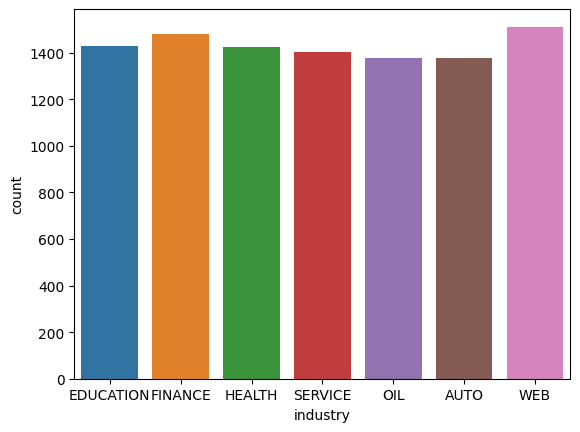

In [203]:
#les domaines d'entreprise qu'on a
sns.countplot(x=df["industry"])


<AxesSubplot: xlabel='degree', ylabel='count'>

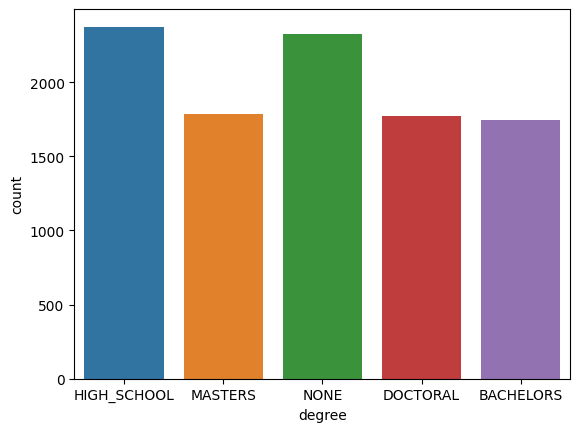

In [204]:

sns.countplot(data=df, x="degree")
#sns.catplot(data=df, x="degree", y="jobType")

<AxesSubplot: xlabel='degree', ylabel='jobType'>

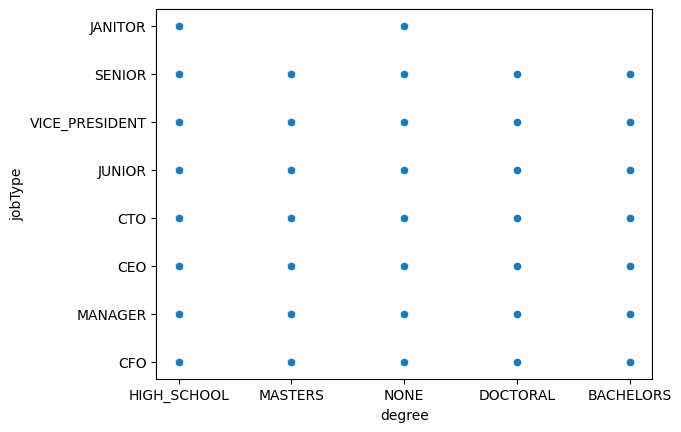

In [205]:
# - Quel sont les postes occupés par rapport au diplôme
sns.scatterplot(data=df, x="degree", y="jobType", size_order="")

#janitor = concierge

In [206]:
#df[df.degree == "NONE"].count()["companyId"]
#df[df.degree != "NONE"].count()["companyId"]


,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
companyId,,,,,,,
COMP0,35,35,35,35,35,35,35
COMP1,45,45,45,45,45,45,45
COMP10,34,34,34,34,34,34,34
COMP11,37,37,37,37,37,37,37
COMP12,34,34,34,34,34,34,34
...,...,...,...,...,...,...,...
COMP61,41,41,41,41,41,41,41
COMP62,37,37,37,37,37,37,37
COMP7,40,40,40,40,40,40,40


In [235]:
undiplomeEmployment = df[df.degree == "NONE"].groupby('companyId').count()
diplomeEmployment = df[df.degree != "NONE"].groupby('companyId').count()
diplomeEmployment.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
companyId,,,,,,,
COMP0,127,127,127,127,127,127,127
COMP1,130,130,130,130,130,130,130
COMP10,114,114,114,114,114,114,114
COMP11,119,119,119,119,119,119,119
COMP12,135,135,135,135,135,135,135


<AxesSubplot: xlabel='industry,degree'>

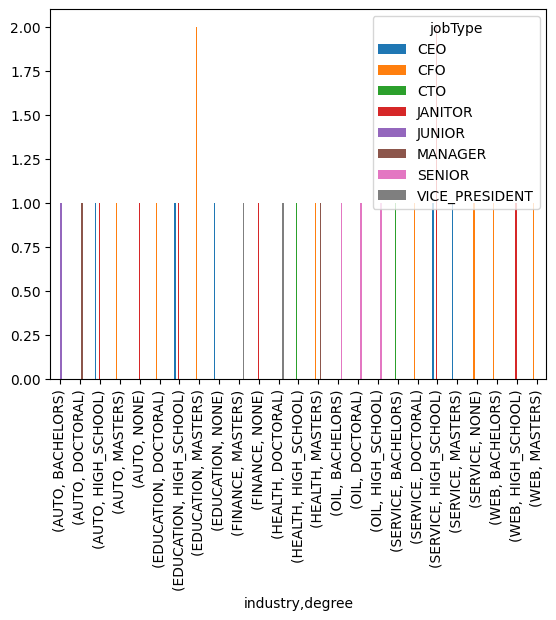

In [258]:
#df.groupby(["companyId","degree", "jobType"]).count()
#sns.relplot(data=df,x="companyId", y="degree", )
#df[df.degree == "NONE"].count()

salaryByGroupAndDiplome = df.sample(31).groupby(["industry","degree", "jobType"]).size().unstack().plot.bar()
salaryByGroupAndDiplome
#sns.catplot
#sns.relplot(x="LotArea", y="SalePrice", data=salaryByGroupAndDiplome, height=12)
#sns.catplot(x="TotalWorkingYears", y="Attrition", data = df, kind= "box", height=7)
